## РК 2. Харитонов А.А. ИУ5-64Б вариант 16
Задание. Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы линейной регрессии и градиентного бустинга. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.<br>
Датасет: https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard

In [73]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('restaurant-scores.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

Выберем для анализа категории inspection_date, inspection_score, inspection_type, risk_category

In [74]:
df = df[['inspection_date', 'inspection_score', 'inspection_type', 'risk_category']]
df['inspection_date'] = pd.to_datetime(df['inspection_date']).dt.strftime('%Y')

In [75]:
df.head()

,inspection_date,inspection_score,inspection_type,risk_category
0,2019,NaN,New Ownership,NaN
1,2019,96.0,Routine - Unscheduled,Moderate Risk
2,2017,NaN,New Ownership,NaN
3,2019,NaN,New Construction,NaN
4,2016,NaN,New Ownership,High Risk


In [76]:
df['inspection_score'] = df['inspection_score'].fillna(df['inspection_score'].mean())
df.nunique()

inspection_date      4
inspection_score    48
inspection_type     15
risk_category        3
dtype: int64

In [77]:
lb = LabelEncoder()
df['inspection_date'] = lb.fit_transform(df['inspection_date'])
df['inspection_type'] = lb.fit_transform(df['inspection_type'])
df['risk_category'] = lb.fit_transform(df['risk_category'])

<AxesSubplot: >

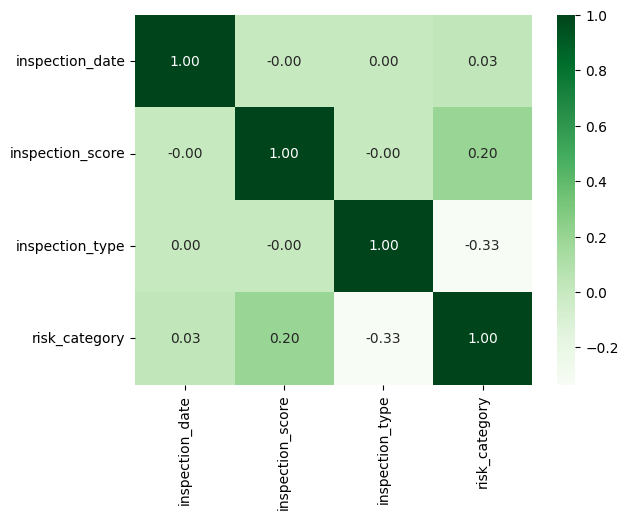

In [78]:
corr = df.corr()
plt.figure()
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, cmap='Greens')

In [84]:
x, y = df.drop(columns=['inspection_score']), df['inspection_score']
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = 1)

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)#
lr_pred = lr.predict(x_test)

Для сравнения качества моделей используем метрики средней абсолютной ошибки и коэффициента детерминации. Первый покажет, насколько предсказанные значения отклоняются от настоящих. Второй покажет, насколько точно модель предсказывает значения в целом.

In [85]:
lr_mae = mean_absolute_error(y_test, lr_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

lr_r2 = r2_score(y_test, lr_pred)
gb_r2 = r2_score(y_test, gb_pred)

pd.DataFrame.from_dict({
    'LR': {
        'MAE': round(lr_mae, 5),
        'R2': f'{round(lr_r2 * 100, 3)}%'
    },
    'GB': {
        'MAE': round(gb_mae, 5),
        'R2': f'{round(gb_r2 * 100, 3)}%'
    }
})

,LR,GB
MAE,5.34598,4.3939
R2,4.299%,19.86%
